### IBM HR Analytics Employee Attrition & Performance

### 1.Reading the data and data description (ทำความเข้าใจ Data)

### 2.Defining the problem 

### 3.The distribution of Target

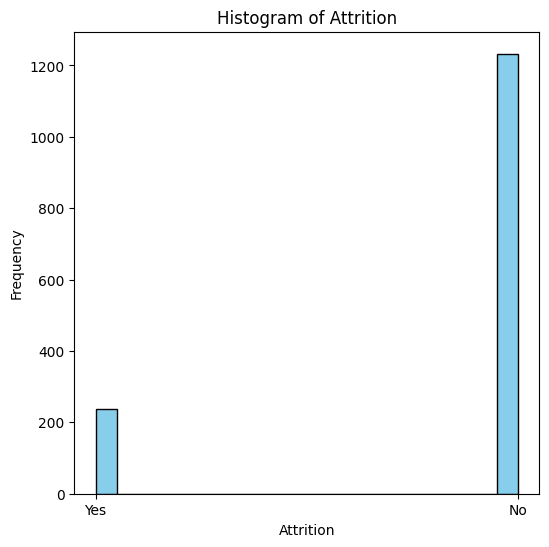

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

file_path = './CSV/WA_Fn-UseC_-HR-Employee-Attrition.csv'
df = pd.read_csv(file_path)

# Plotting Histogram for the 'death' column
plt.figure(figsize=(6, 6))
plt.hist(df['Attrition'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Attrition')
plt.xlabel('Attrition')
plt.ylabel('Frequency')
plt.show()

### 4.Basic Data Exploration (การสำรวจข้อมูลเบื้องต้น)

##### 4.1 สำรวจประเภทของข้อมูล และจำนวน Missing Value ของแต่ละ Feature

##### 4.2 การสรุปสถิติ  


##### 4.3 Cleaning Data
จัดการ Data ด้วยการตัด column ที่มี missing value มากกว่า 40% และตัด row ที่มี missing value มากกว่า 30% 

เพราะปริมาณข้อมูลที่สูญหายมากเกินไป จึงไม่สามารถใช้วิธีนำมาเติม Missing Value ได้

In [4]:
import os

# เก็บจำนวนคอลัมน์และแถวก่อนการลบ
cols_before = df.columns
rows_before = df.shape[0]

# ลบคอลัมน์ที่มีค่าหายไปมากกว่า 40%
df = df.loc[:, df.isnull().mean() < 0.4]
cols_after = df.columns

# ลบแถวที่มีค่าหายไปมากกว่า 30%
df = df.dropna(thresh=len(df.columns) * 0.7)
rows_after = df.shape[0]

# คำนวณจำนวนคอลัมน์ที่ถูกลบออก
cols_dropped = set(cols_before) - set(cols_after)

# คำนวณจำนวนแถวที่ถูกลบ
rows_dropped = rows_before - rows_after

# แสดงผลลัพธ์
print("cols_before : ",cols_before)
print("cols_After : ",cols_after)
print("คอลัมน์ที่ถูกลบ:")
print(cols_dropped)
print("\nคอลัมน์ที่ยังคงอยู่:")
print(df.columns)
print(f"\nจำนวนแถวที่ถูกลบ: {rows_dropped}")
print("\nข้อมูลตัวอย่างหลังการลบ:")

#ปริ้นตารางมาเช็ค
df.head()

folder_path = 'CSV'
output_file = os.path.join(folder_path, 'cleaning.csv')
df.to_csv(output_file, index=False)

cols_before :  Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
cols_After :  Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 

##### 4.3.Plot Graph

พลอตกราฟเพื่อดูการกระจายตัวของข้อมูล เพื่อดูความสมมาตรและความเบ้ของข้อมูล โดย
- ตัวแปรเชิงหมวดหมู่: บาร์พล็อต
- ตัวแปรต่อเนื่อง: ฮิสโทแกรมและบ็อกซ์พล็อต

##### แสดงภาพการกระจายตัวของตัวแปร Categorical Predictor ทั้งหมดในข้อมูลโดยใช้กราฟแท่ง

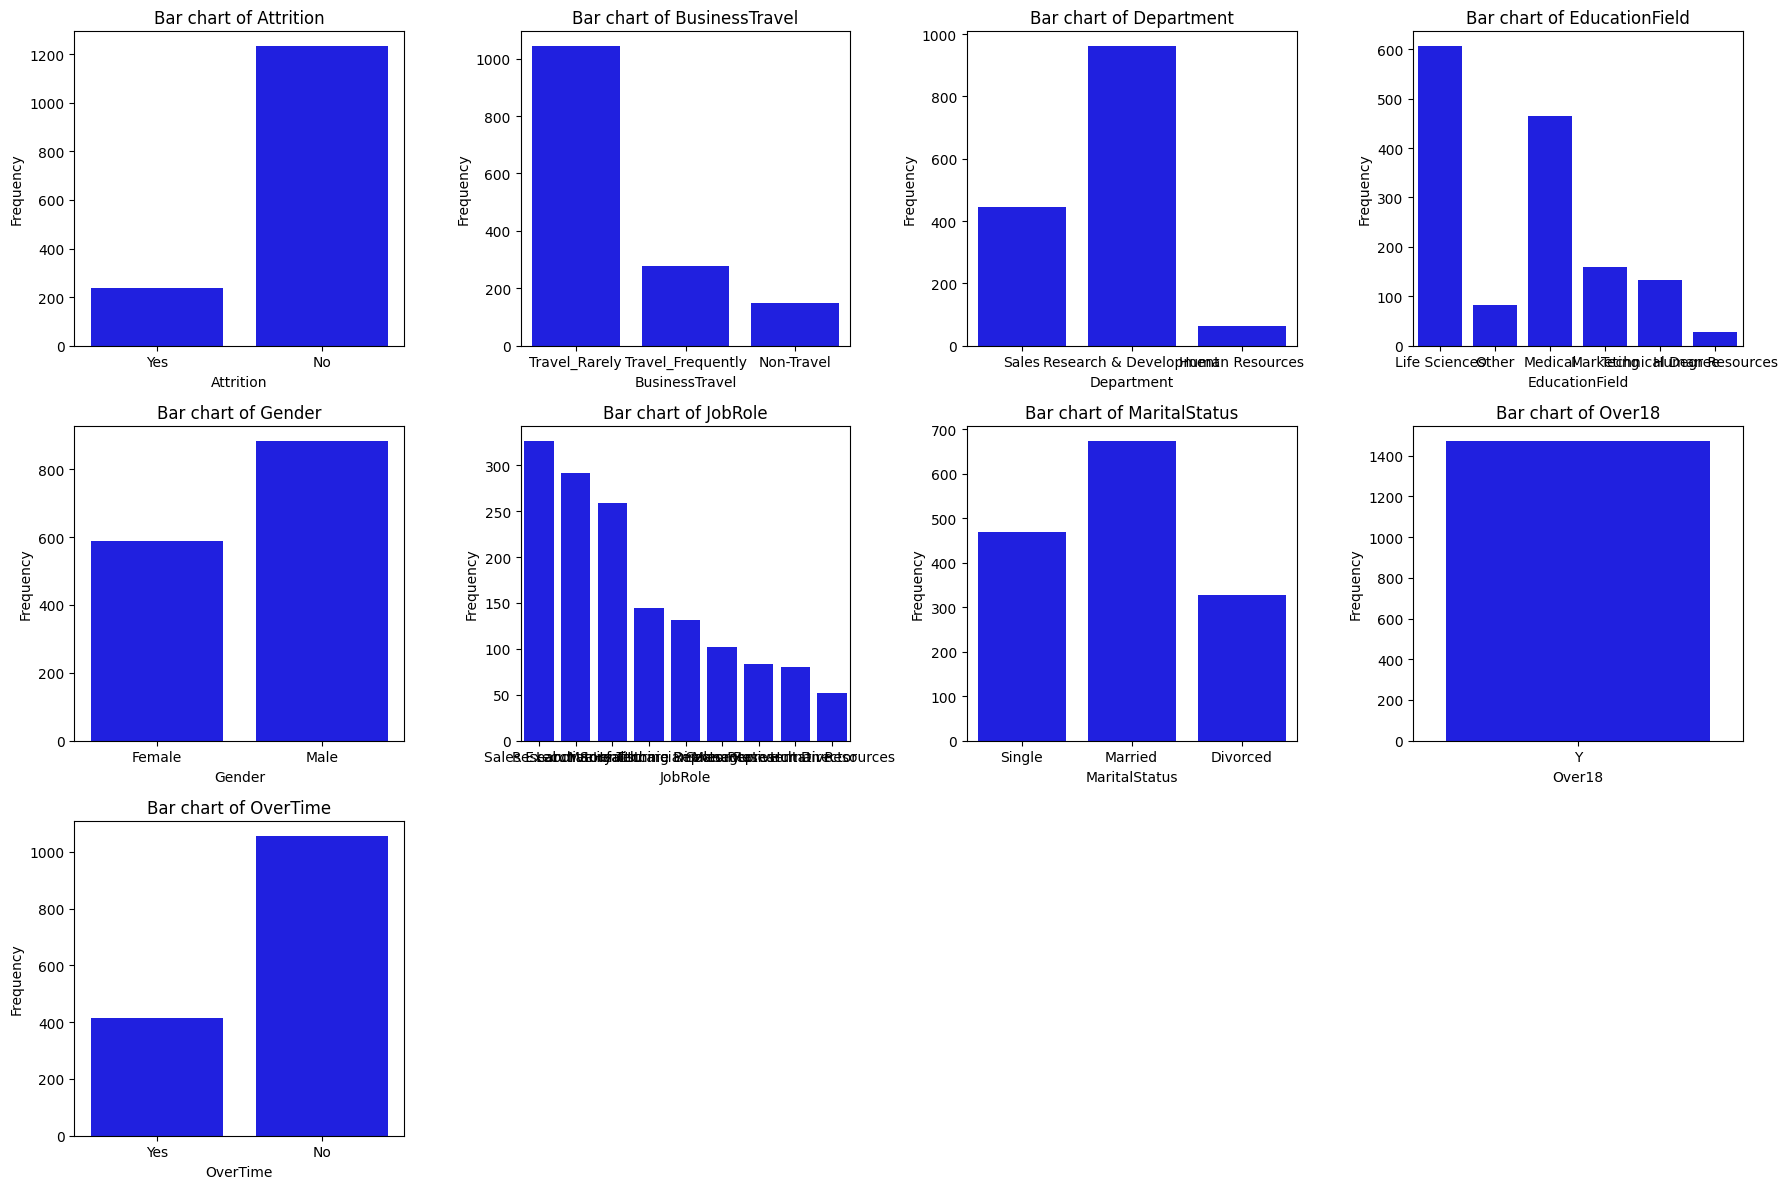

In [9]:
import seaborn as sns

# Load the data from the uploaded file
file_path = './CSV/cleaning.csv'
data = pd.read_csv(file_path)

# List of specific columns to plot
columns_to_plot = ['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']

# Set the number of rows and columns for subplots
n_cols = 4
n_rows = (len(columns_to_plot) // n_cols) + 1

# Create subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Plot bar plots for each specified column with blue color
for i, column in enumerate(columns_to_plot):
    sns.countplot(data=data, x=column, ax=axes[i], color='blue')
    axes[i].set_title(f'Bar chart of {column}')
    axes[i].set_ylabel('Frequency')

# Remove any extra subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

### 5.Data Transformation and Extraction (การแปลงและการดึงข้อมูล)

#### 5.1 เปลี่ยน Feature ที่ Data เป็นประเภท Catagorical เป็น Numerical

In [12]:
from sklearn.preprocessing import LabelEncoder

#เลือก Column ที่มั่นใจว่าไม่ใช่ Numeric
categorical_columns = ['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder() # ใช้การ Encoder ในการแปลง
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le
print(f"Categorical columns: {categorical_columns}")
df[categorical_columns].head()

folder_path = 'CSV'
output_file = os.path.join(folder_path, 'to_cat.csv')
df.to_csv(output_file, index=False)


Categorical columns: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
